<a href="https://colab.research.google.com/github/MaycolCruz/TSKC/blob/main/Proyecto_final_grupo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este proyecto busca analizar un conjunto de datos relacionado con la depresión en estudiantes, con el objetivo de construir un modelo predictivo que identifique
si un estudiante puede estar en riesgo de depresión basado en características específicas del dataset.
Para lograr este objetivo, se emplea la metodología CRISP-DM, que permite estructurar el proceso de análisis en seis fases clave:
1. Comprensión del negocio
2. Comprensión de los datos
3. Preparación de los datos
4. Modelado
5. Evaluación
6. Despliegue

# **---- Fase 1: Comprensión del Negocio ----**
El problema que buscamos abordar es identificar patrones en los datos de estudiantes para predecir la probabilidad de depresión. Este análisis podría ayudar a instituciones educativas a implementar estrategias de intervención temprana.

# **---- Fase 2: Comprensión de los Datos ----**



In [ ]:
import pandas as pd

def load_housing_data():
    csv_path = "Depression Student Dataset.csv"
    return pd.read_csv(csv_path)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# Función para preprocesar los datos
def preprocess_data(df):
    # --- 1. Limpieza de datos ---
    # Imputar valores faltantes
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    # Eliminar duplicados
    df = df.drop_duplicates()

    # Identificar outliers (usando IQR para columnas numéricas)
    def remove_outliers(df, col):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        df = remove_outliers(df, col)

    # --- 2. Transformación y normalización ---
    # Identificar variables categóricas y numéricas
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Escalado y codificación usando un ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ],
        remainder='passthrough'  # Para mantener columnas no transformadas si aplica
    )

    # Aplicar imputación a los datos originales
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    # Convertir los datos transformados a un array y luego a un DataFrame
    transformed_data = preprocessor.fit_transform(df)
    feature_names = (
        numerical_cols.tolist()
        + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
    )

    # Convertir el resultado a un DataFrame con nombres de columnas
    df_transformed = pd.DataFrame(transformed_data, columns=feature_names)

    return df_transformed

In [ ]:
dataset = load_housing_data()

In [ ]:
processed_data = preprocess_data(dataset)

In [ ]:
print("Estadísticas descriptivas:")
print(processed_data.describe())

Estadísticas descriptivas:
                Age  Academic Pressure  Study Satisfaction   Study Hours  \
count  5.020000e+02       5.020000e+02        5.020000e+02  5.020000e+02   
mean  -2.494684e-16       8.846399e-18        2.123136e-17 -1.415424e-17   
std    1.000998e+00       1.000998e+00        1.000998e+00  1.000998e+00   
min   -1.684725e+00      -1.443146e+00       -1.512765e+00 -1.712995e+00   
25%   -8.670001e-01      -7.230075e-01       -7.839667e-01 -9.105782e-01   
50%    5.294035e-02      -2.869077e-03       -5.516803e-02  1.593112e-01   
75%    7.684496e-01       7.172693e-01        6.736307e-01  9.617283e-01   
max    1.586174e+00       1.437408e+00        1.402429e+00  1.496673e+00   

       Financial Stress  Gender_Female  Gender_Male  Sleep Duration_5-6 hours  \
count      5.020000e+02     502.000000   502.000000                502.000000   
mean      -4.600127e-17       0.468127     0.531873                  0.245020   
std        1.000998e+00       0.499481     0.

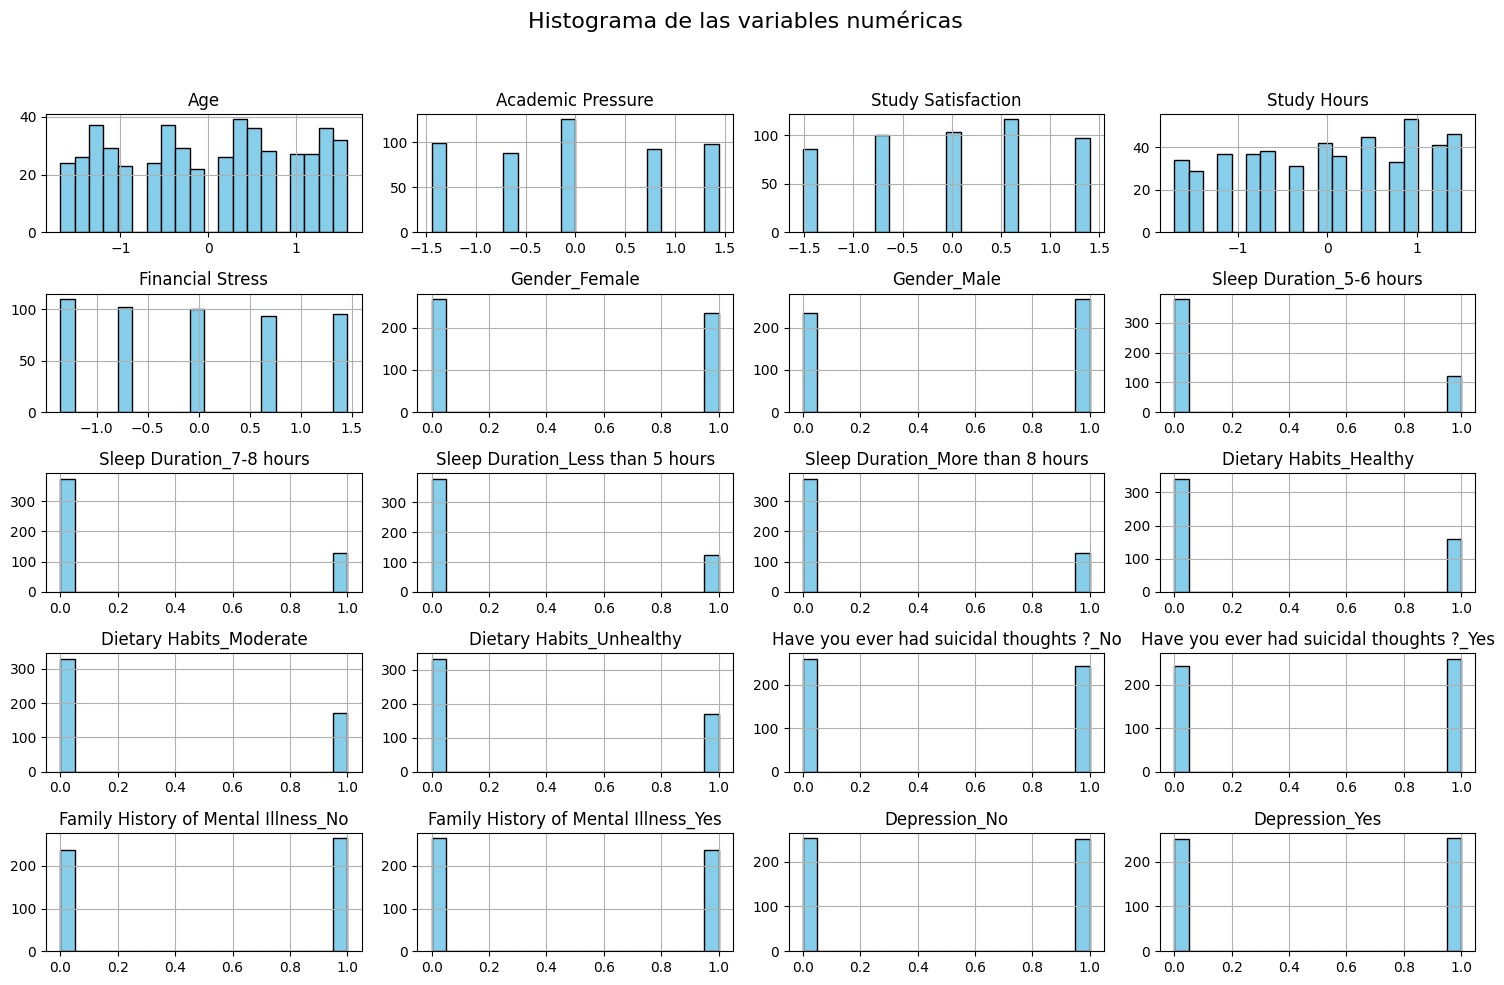

In [ ]:
import matplotlib.pyplot as plt
processed_data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograma de las variables numéricas", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

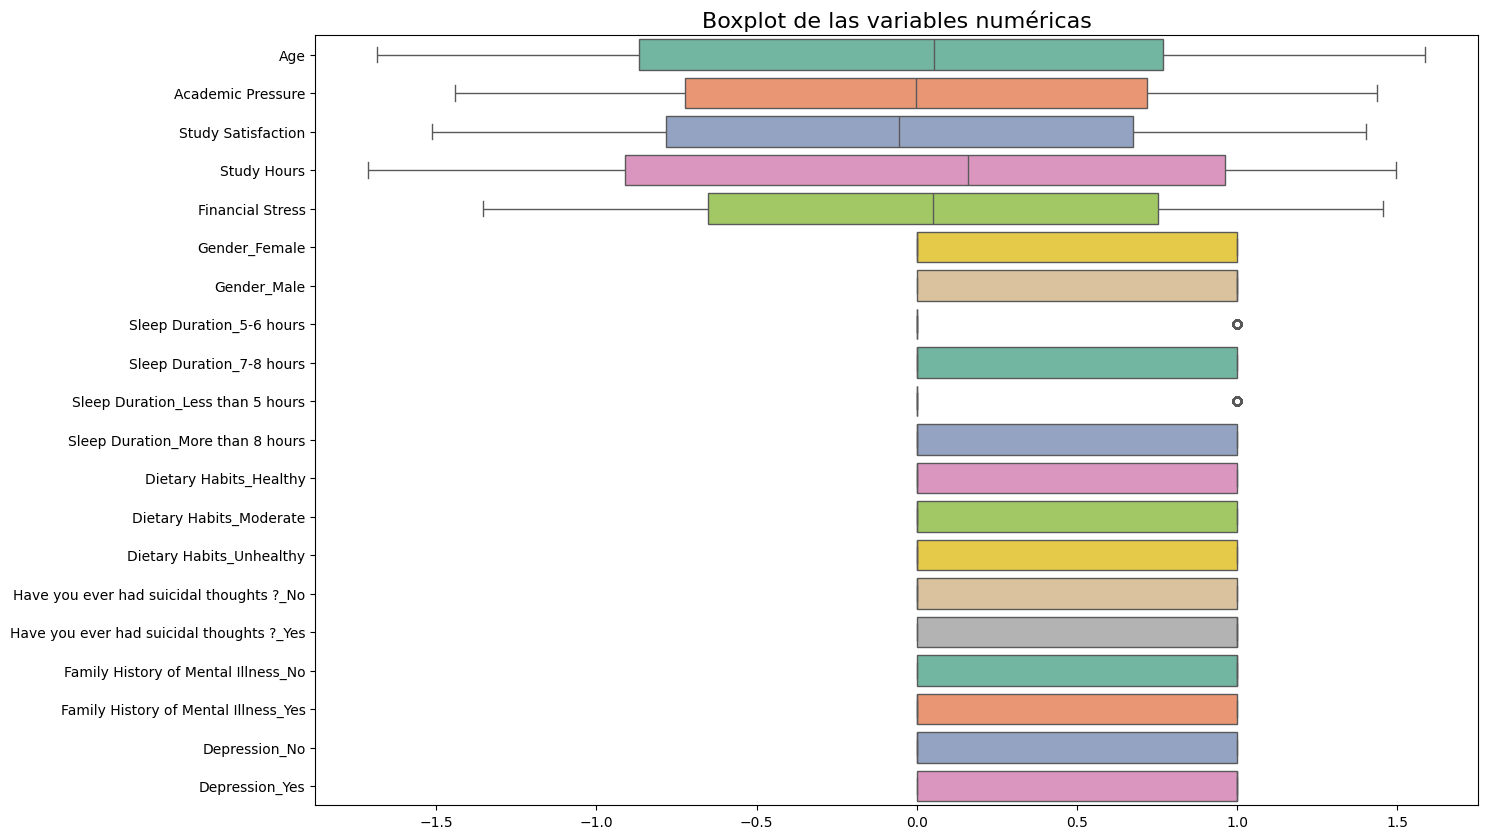

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.boxplot(data=processed_data, orient='h', palette='Set2')
plt.title("Boxplot de las variables numéricas", fontsize=16)
plt.show()

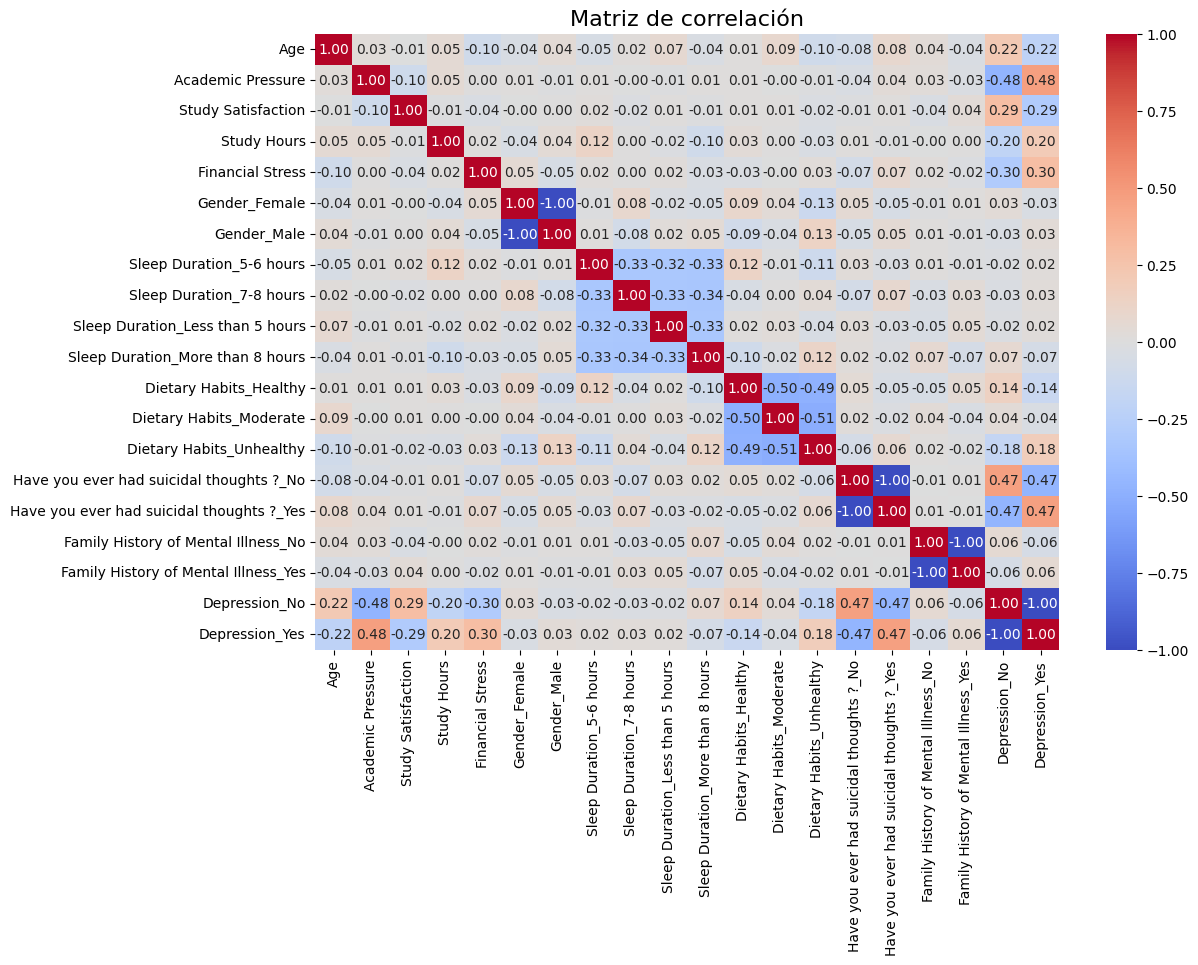

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = processed_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación", fontsize=16)
plt.show()

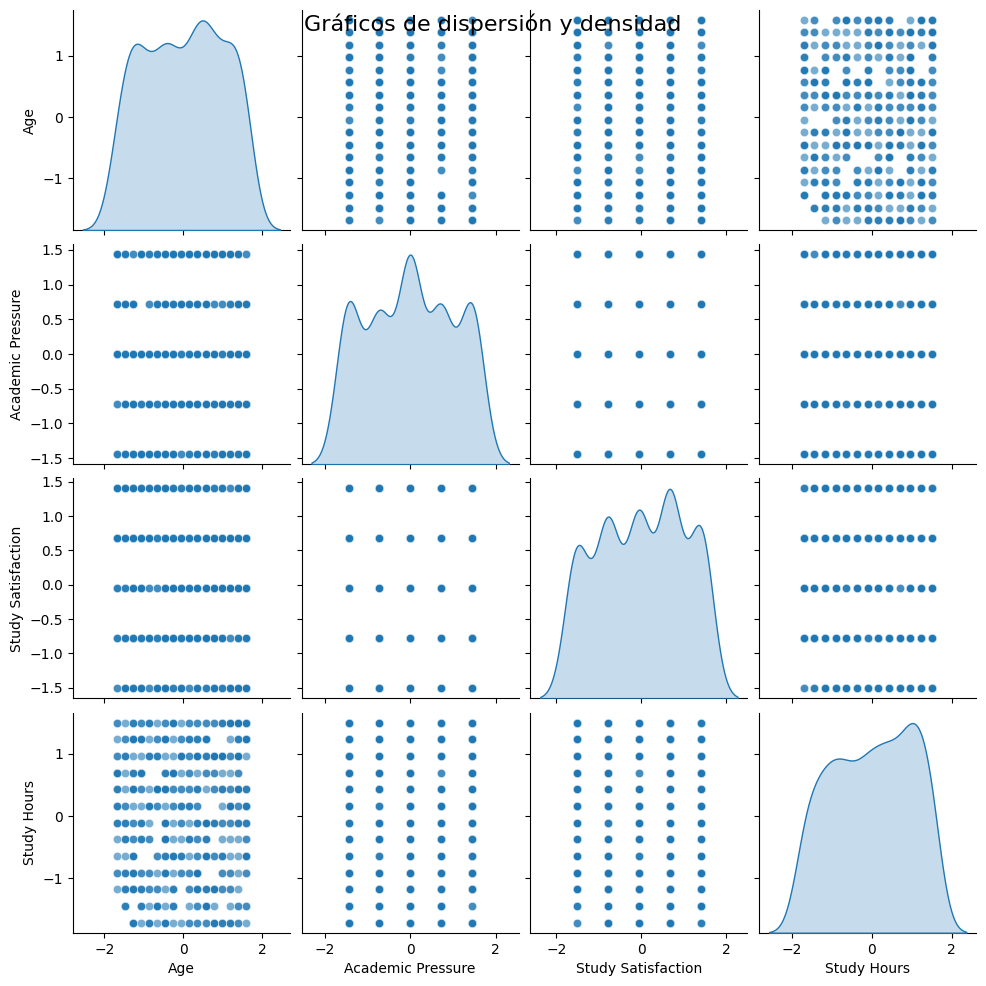

In [ ]:
scatter_columns = processed_data.columns[:4]
sns.pairplot(processed_data[scatter_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Gráficos de dispersión y densidad", fontsize=16)
plt.show()

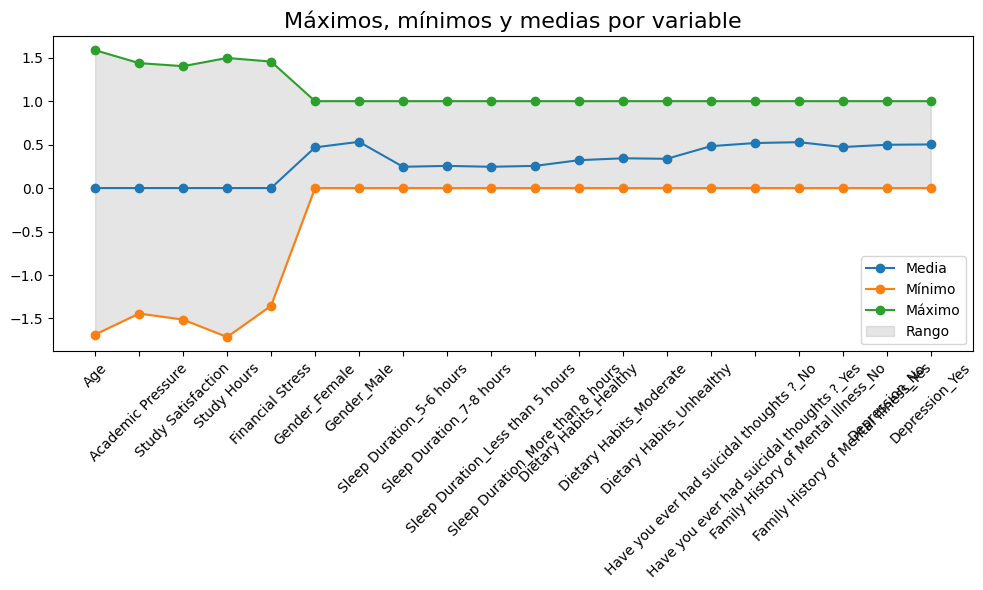

In [ ]:
statistics = processed_data.describe()

plt.figure(figsize=(10, 6))
x = range(len(statistics.columns))
plt.plot(x, statistics.loc['mean'], label='Media', marker='o')
plt.plot(x, statistics.loc['min'], label='Mínimo', marker='o')
plt.plot(x, statistics.loc['max'], label='Máximo', marker='o')
plt.fill_between(x, statistics.loc['min'], statistics.loc['max'], color='gray', alpha=0.2, label='Rango')
plt.xticks(x, statistics.columns, rotation=45)
plt.title("Máximos, mínimos y medias por variable", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = processed_data.drop(columns=['Depression_Yes', 'Depression_No'])  # Variables independientes
y = processed_data['Depression_Yes']  # Variable dependiente


# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear el modelo
decision_tree = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
decision_tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = decision_tree.predict(X_test)

# Evaluación
print("Árbol de Decisión - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_tree))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_tree))
print("Exactitud:", accuracy_score(y_test, y_pred_tree))


Árbol de Decisión - Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88        48
         1.0       0.88      0.92      0.90        53

    accuracy                           0.89       101
   macro avg       0.89      0.89      0.89       101
weighted avg       0.89      0.89      0.89       101

Matriz de Confusión:
[[41  7]
 [ 4 49]]
Exactitud: 0.8910891089108911


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Predicciones
y_pred_forest = random_forest.predict(X_test)

# Evaluación
print("Random Forest - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_forest))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_forest))
print("Exactitud:", accuracy_score(y_test, y_pred_forest))


Random Forest - Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95        48
         1.0       0.93      0.98      0.95        53

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101

Matriz de Confusión:
[[44  4]
 [ 1 52]]
Exactitud: 0.9504950495049505


In [ ]:
from sklearn.svm import SVC

# Crear el modelo
svm = SVC(kernel='linear', random_state=42)

# Entrenar el modelo
svm.fit(X_train, y_train)

# Predicciones
y_pred_svm = svm.predict(X_test)

# Evaluación
print("SVM - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_svm))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_svm))
print("Exactitud:", accuracy_score(y_test, y_pred_svm))


SVM - Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        48
         1.0       0.95      0.98      0.96        53

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101

Matriz de Confusión:
[[45  3]
 [ 1 52]]
Exactitud: 0.9603960396039604


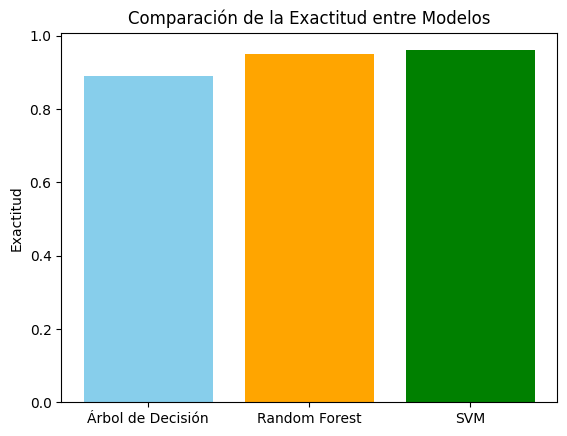

In [ ]:
models = ['Árbol de Decisión', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_forest),
    accuracy_score(y_test, y_pred_svm)
]

plt.bar(models, accuracies, color=['skyblue', 'orange', 'green'])
plt.title("Comparación de la Exactitud entre Modelos")
plt.ylabel("Exactitud")
plt.show()


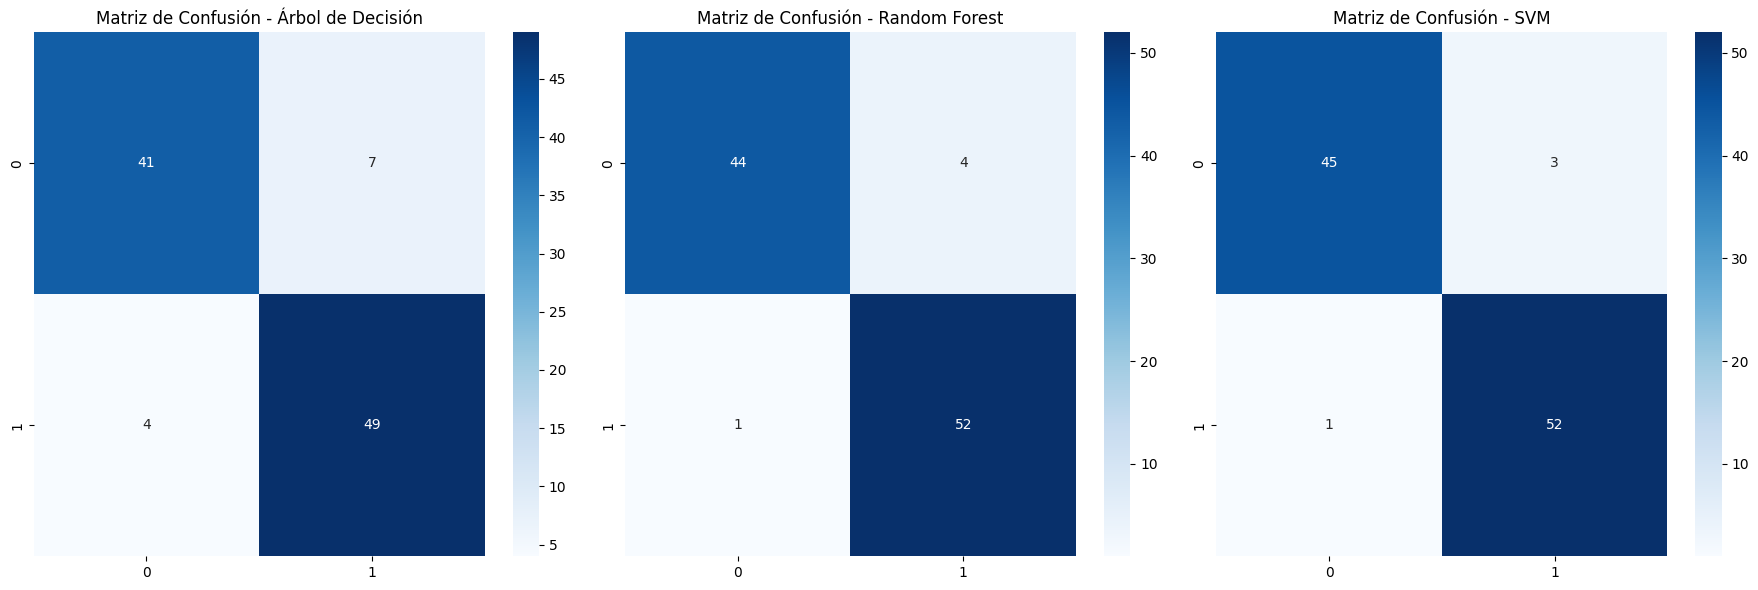

In [ ]:
# Visualización de las matrices de confusión para los tres modelos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusión - Árbol de Decisión')

sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Matriz de Confusión - Random Forest')

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Matriz de Confusión - SVM')

plt.tight_layout()
plt.show()


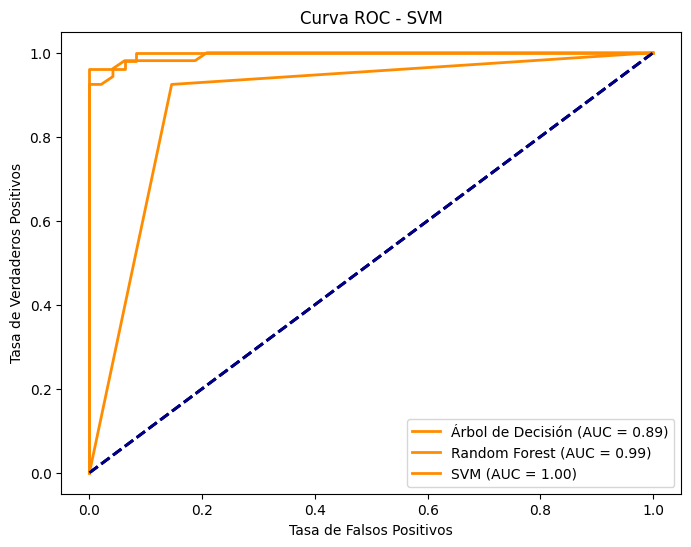

In [ ]:
from sklearn.metrics import roc_curve, auc

# Función para calcular y visualizar la Curva ROC
def plot_roc_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # Si el modelo no tiene predict_proba, usamos el método decision_function (por ejemplo en SVM)
        y_prob = model.decision_function(X_test)

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Visualizar la curva ROC
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc='lower right')

# Graficar la curva ROC para cada modelo
plt.figure(figsize=(8,6))

# Árbol de Decisión
plot_roc_curve(decision_tree, X_test, y_test, "Árbol de Decisión")

# Random Forest
plot_roc_curve(random_forest, X_test, y_test, "Random Forest")

# SVM (asegúrate de que el SVM está configurado para probabilidad)
if not hasattr(svm, "predict_proba"):
    svm = SVC(kernel='linear', probability=True, random_state=42)  # Reentrenar el SVM con probability=True
    svm.fit(X_train, y_train)
plot_roc_curve(svm, X_test, y_test, "SVM")

plt.show()


In [ ]:
print(processed_data.columns)  # Asumiendo que 'df' es tu DataFrame

Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours',
       'Financial Stress', 'Gender_Female', 'Gender_Male',
       'Sleep Duration_5-6 hours', 'Sleep Duration_7-8 hours',
       'Sleep Duration_Less than 5 hours', 'Sleep Duration_More than 8 hours',
       'Dietary Habits_Healthy', 'Dietary Habits_Moderate',
       'Dietary Habits_Unhealthy', 'Have you ever had suicidal thoughts ?_No',
       'Have you ever had suicidal thoughts ?_Yes',
       'Family History of Mental Illness_No',
       'Family History of Mental Illness_Yes', 'Depression_No',
       'Depression_Yes'],
      dtype='object')


In [ ]:
print(X_train.shape)  # Debería mostrar (n_samples, 18)

(401, 18)


In [ ]:
# Si X_train es un DataFrame de pandas
print(X_train.columns)  # Esto mostrará las columnas utilizadas en el conjunto de entrenamiento


Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours',
       'Financial Stress', 'Gender_Female', 'Gender_Male',
       'Sleep Duration_5-6 hours', 'Sleep Duration_7-8 hours',
       'Sleep Duration_Less than 5 hours', 'Sleep Duration_More than 8 hours',
       'Dietary Habits_Healthy', 'Dietary Habits_Moderate',
       'Dietary Habits_Unhealthy', 'Have you ever had suicidal thoughts ?_No',
       'Have you ever had suicidal thoughts ?_Yes',
       'Family History of Mental Illness_No',
       'Family History of Mental Illness_Yes'],
      dtype='object')


In [ ]:
# Si usaste un ColumnTransformer para preprocesar
print(preprocessor.get_feature_names_out())


['num__Age' 'num__Academic Pressure' 'num__Study Satisfaction'
 'num__Study Hours' 'num__Financial Stress' 'cat__Gender_Female_0.0'
 'cat__Gender_Female_1.0' 'cat__Gender_Male_0.0' 'cat__Gender_Male_1.0'
 'cat__Sleep Duration_5-6 hours_0.0' 'cat__Sleep Duration_5-6 hours_1.0'
 'cat__Sleep Duration_7-8 hours_0.0' 'cat__Sleep Duration_7-8 hours_1.0'
 'cat__Sleep Duration_Less than 5 hours_0.0'
 'cat__Sleep Duration_Less than 5 hours_1.0'
 'cat__Sleep Duration_More than 8 hours_0.0'
 'cat__Sleep Duration_More than 8 hours_1.0'
 'cat__Dietary Habits_Healthy_0.0' 'cat__Dietary Habits_Healthy_1.0'
 'cat__Dietary Habits_Moderate_0.0' 'cat__Dietary Habits_Moderate_1.0'
 'cat__Dietary Habits_Unhealthy_0.0' 'cat__Dietary Habits_Unhealthy_1.0'
 'cat__Have you ever had suicidal thoughts ?_No_0.0'
 'cat__Have you ever had suicidal thoughts ?_No_1.0'
 'cat__Have you ever had suicidal thoughts ?_Yes_0.0'
 'cat__Have you ever had suicidal thoughts ?_Yes_1.0'
 'cat__Family History of Mental Illness_No_

In [ ]:
# Características del nuevo estudiante
# Asegúrate de que el orden y los valores correspondan a los de las variables de entrada
nuevo_estudiante = [
    20,
    3,
    4,
    15,
    2,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    1,
]

# Verifica las características del conjunto de entrenamiento (X_train) y el nuevo estudiante
print("Número de características de X_train:", X_train.shape[1])  # Debe ser 18
print("Número de características de nuevo_estudiante_df:", nuevo_estudiante_df.shape[1])  # Esto también debe ser 18

# Asegúrate de que el preprocesador se haya ajustado correctamente
preprocessor.fit(X_train)

# Ahora transforma el nuevo estudiante
nuevo_estudiante_preprocesado = preprocessor.transform(nuevo_estudiante_df)

# Verifica el número de características transformadas
print("Número de características después de la transformación:", nuevo_estudiante_preprocesado.shape[1])

# Realizar la predicción usando el modelo SVM
prediccion = svm.predict(nuevo_estudiante_preprocesado)

# Mostrar la predicción
if prediccion[0] == 1:
    print("El estudiante está en riesgo de depresión.")
else:
    print("El estudiante no está en riesgo de depresión.")




Número de características de X_train: 18
Número de características de nuevo_estudiante_df: 18
Número de características después de la transformación: 31


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 31 features, but SVC is expecting 18 features as input.

In [ ]:
print(new_student_df.columns)


Index(['num__Age', 'num__Academic Pressure', 'num__Study Satisfaction',
       'num__Study Hours', 'num__Financial Stress', 'cat__Gender_Female_1.0',
       'cat__Gender_Male_0.0', 'cat__Sleep Duration_5-6 hours_1.0',
       'cat__Sleep Duration_7-8 hours_1.0',
       'cat__Sleep Duration_Less than 5 hours_0.0',
       'cat__Sleep Duration_More than 8 hours_0.0',
       'cat__Dietary Habits_Healthy_1.0', 'cat__Dietary Habits_Moderate_0.0',
       'cat__Dietary Habits_Unhealthy_0.0',
       'cat__Have you ever had suicidal thoughts ?_No_1.0',
       'cat__Have you ever had suicidal thoughts ?_Yes_0.0',
       'cat__Family History of Mental Illness_No_1.0',
       'cat__Family History of Mental Illness_Yes_0.0'],
      dtype='object')
